In [1]:
%matplotlib inline

#import all the modules
import sqlite3
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
#from sklearn.metrics import roc_curve,auc
#from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
conn=sqlite3.connect('D:/Applied AI Course/final2.sqlite')
conn.cursor()
conn.commit()
conn.text_factory=str
#final_data.to_sql('Reviews',conn,schema=None,if_exists='replace')

In [3]:
fd=pd.read_sql_query("""SELECT * FROM REVIEWS""",conn)

In [4]:
fd.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...


In [5]:
conn2=sqlite3.connect('D:/Applied AI Course/final.sqlite')

In [6]:
label_df=pd.read_sql_query("""SELECT * FROM REVIEWS""",conn2)

In [7]:
label_df.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,Positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,Positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,Positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...


In [8]:
label_df=label_df.sort_values('Time',axis=0,inplace=False,kind='quicksort')

In [9]:
fd=fd.sort_values('Time',axis=0,inplace=False,kind='quicksort')

In [10]:
fd.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...


In [11]:
label_df.shape

(364173, 12)

In [12]:
fd.shape

(364173, 11)

# Sampleset data

In [13]:
d_pos=label_df[label_df["Score"] == 'Positive'].sample(n=20000)
d_neg=label_df[label_df["Score"] == 'Negative'].sample(n=20000)
finald=pd.concat([d_pos,d_neg])
finald.shape

(40000, 12)

In [14]:
finald.head(2)
final_d=finald.sort_values(by='Time')
final_d.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
325,346094,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,Positive,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,get crazyim look beatlejuic french version vid...
362,346077,374382,B00004CI84,A3C3BAQDZWH5YE,Kushana no shinryaku (Kushana's invasion),0,1,Positive,1014681600,...,"It was on the other night, and, having been a ...",night big fan cartoon shown decid watch also t...
1065,443667,479728,B00005U2FA,AR5RRP9N2UXDJ,"Boraxo ""Boraxo""",21,23,Positive,1029196800,It really works,"I was very skeptical when I bought this item, ...",skeptic bought item imagin amaz discov actual ...


# Bag of Words

In [91]:
X=final_d["CleanedText"]
X.shape

(40000,)

In [92]:
y=final_d["Score"]
y.shape

(40000,)

In [93]:
#split the data into train and test fo bag of words

X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3)

In [94]:
count_vect=CountVectorizer()
stdscaler=StandardScaler(with_mean=False)
#final_count=count_vect.fit_transform(test_data["CleanedText"].values)
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.fit_transform(X_test)
print("the type of count vectorizer is:",type(X_train))
#final_count.get_shape()
print(X_train.shape,X_test.shape)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


the type of count vectorizer is: <class 'scipy.sparse.csr.csr_matrix'>
(28000, 26755) (12000, 26755)


In [95]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(28000, 26755) (28000,) (12000, 26755) (12000,)


# Find the best alpha using cross validation for Laplace smoothing

Optimal alpha:  1
####################################################################################################


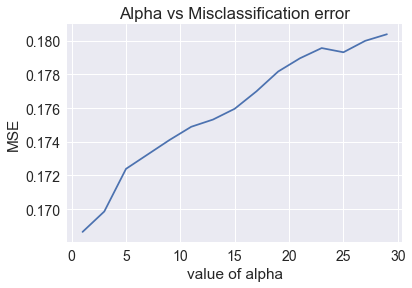

In [46]:
#find the best alpha based on cv accuracy for bow
#l_a={'alpha':[1000,500,100,50,10,5,0.1,0.05,0.001]}
#alpha_set=list(range(float(1e-0,20,1e-4)))
#for i in alpha_set:
    # instantiate learning model (alpha = 10)
bNB=BernoulliNB()
alpha_list = list(range(1,30,2))
cv_score = []
for i in alpha_list:
    bNB = BernoulliNB(alpha=i)
    scores = cross_val_score(bNB, X_train, Y_train, cv=3, scoring="accuracy")
    cv_score.append(scores.mean())

MSE = [1-x for x in cv_score]
optimal_alpha = alpha_list[MSE.index(min(MSE))]
print("Optimal alpha: ",optimal_alpha)
print('#'*100)
import matplotlib.pyplot as plt
plt.plot(alpha_list, MSE)
plt.title("Alpha vs Misclassification error")
plt.xlabel("value of alpha")
plt.ylabel("MSE")
plt.show()
#nB = BernoulliNB()
#cls=GridSearchCV(nB,l_a,cv=10)
    # fitting the model on crossvalidation train
#bNB.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
#pred = bNB.predict(X_cv)

    # evaluate CV accuracy
#acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
#print("Best HyperParameter: ",cls.best_params_)
#print("Best Accuracy: %.2f%%"%(cls.best_score_*100))
#test accuracy    
#nB = BernoulliNB(alpha=1000)
#nB.fit(X_train,Y_train)
#pred = nB.predict(X_test)
#acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
#print('\n****Test accuracy for alpha = 1000 is %d%%' % (acc))

# Naive Bayes


In [49]:
#BernoulliNB with optimal k and test accuracy for bag of words

nB_opt=BernoulliNB(alpha=optimal_alpha)
#fit the model
nB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=%d is %f%%' % (optimal_alpha,(acc_score)))
print('#'*100)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))
print('%'*50)
training_accuracy = nB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for bag of words model with optimal a=1 is 83.225000%
####################################################################################################
Number of mislabeled points out of a total 28000 points : 2013
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
training error:0.13%
####################################################################################################
training accuracy:0.87%
####################################################################################################
test error:0.17%
####################################################################################################
test accuracy:0.83%


# Feature importance

In [32]:
#pred_proba = nB_opt.predict_proba(X_test)
#words = np.take(count_vect.get_feature_names(), pred_proba.argmax(axis=1))

feat_name=np.array(count_vect.get_feature_names())
f_cnt=nB_opt.feature_count_
log_prob = nB_opt.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns=feat_name).T
#sorted_idx=nB_opt.coef_[0].argsort()
#print("smallest coeffecient is: \n {} \n".format(feat_name[sorted_idx[:10]]))
#print("largest coefficient is: \n {} \n".format(feat_name[sorted_idx[:-11:-1]]))
top_positive = feature_prob[1].sort_values(ascending=False)[:10]
top_negative = feature_prob[0].sort_values(ascending=False)[:10]

In [50]:
def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(count_vect,nB_opt)

			Positive						Negative
________________________________________________________________________________________________
	-9.5446	aa             				-1.1841	like           
	-9.5446	aaaaaaarrrrrggghhh				-1.2084	tast           
	-9.5446	aachen         				-1.2601	love           
	-9.5446	abalon         				-1.2754	good           
	-9.5446	abbrevi        				-1.3016	great          
	-9.5446	abc            				-1.4181	flavor         
	-9.5446	aberr          				-1.4904	one            
	-9.5446	abhorr         				-1.5000	use            
	-9.5446	abid           				-1.5352	tri            
	-9.5446	abiet          				-1.5493	product        
	-9.5446	abnorm         				-1.6585	make           
	-9.5446	abod           				-1.6953	get            
	-9.5446	abort          				-1.8859	buy            
	-9.5446	abosolut       				-1.9054	time           
	-9.5446	abottl         				-1.9175	realli         
	-9.5446	abound         				-1.9482	would          
	-9.5446	abour          				-1.9824	best  

# Confusion matrix

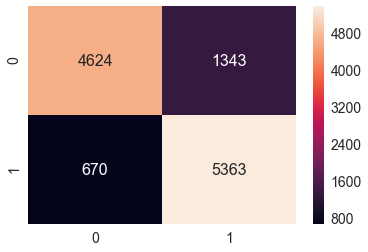

In [51]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [52]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.87      0.77      0.82      5967
   Positive       0.80      0.89      0.84      6033

avg / total       0.84      0.83      0.83     12000



# Grid Search cross validation

In [77]:
nB = BernoulliNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
gsv=GridSearchCV(nB,param_grid,cv=3,verbose=1)
gsv.fit(X_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   19.0s finished


Best HyperParameter:  {'alpha': 100}
Best Accuracy: 49.74%


In [78]:
nB_opt=BernoulliNB(alpha=100)
#fit the model
nB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=100 is %f%%' %acc_score)
print('#'*100)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))
print('%'*50)
training_accuracy = nB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for bag of words model with optimal a=100 is 49.475000%
####################################################################################################
Number of mislabeled points out of a total 28000 points : 6063
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
training error:0.49%
####################################################################################################
training accuracy:0.51%
####################################################################################################
test error:0.51%
####################################################################################################
test accuracy:0.49%


# Multinomial Naive Bayes

Optimal alpha:  0
####################################################################################################


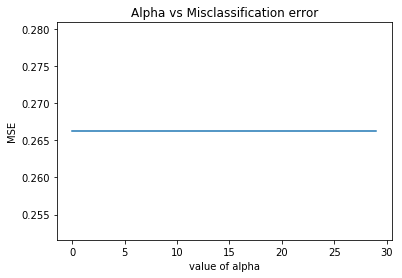

In [23]:
mNB=MultinomialNB()
alpha_list = list(range(0,30,1))
#alpha=list(filter(lambda x: x % 2 != 0, alpha_list))
cv_score = []
for i in alpha_list:
    bNB = MultinomialNB(alpha=i)
    scores = cross_val_score(mNB, X_train, Y_train, cv=10, scoring="accuracy")
    cv_score.append(scores.mean())

MSE = [1-x for x in cv_score]
optimal_alpha = alpha_list[MSE.index(min(MSE))]
print("Optimal alpha: ",optimal_alpha)
print('#'*100)
import matplotlib.pyplot as plt
plt.plot(alpha_list, MSE)
plt.title("Alpha vs Misclassification error")
plt.xlabel("value of alpha")
plt.ylabel("MSE")
plt.show()

In [24]:
mNB_opt=MultinomialNB(alpha=0)
#fit the model
mNB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=%d is %f%%' % (optimal_alpha,(acc_score)))
print('#'*100)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))
print('%'*50)
training_accuracy = mNB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)

e:\sofs\python3.6\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)



 the accuracy score for bag of words model with optimal a=0 is 75.125000%
####################################################################################################
Number of mislabeled points out of a total 28000 points : 2985
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
training error:0.10%
####################################################################################################
training accuracy:0.90%
####################################################################################################
test error:0.25%
####################################################################################################
test accuracy:0.75%


# Feature Importance

In [26]:
feat_name=np.array(count_vect.get_feature_names())
f_cnt=mNB_opt.feature_count_
log_prob = mNB_opt.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns=feat_name).T
#sorted_idx=nB_opt.coef_[0].argsort()
#print("smallest coeffecient is: \n {} \n".format(feat_name[sorted_idx[:10]]))
#print("largest coefficient is: \n {} \n".format(feat_name[sorted_idx[:-11:-1]]))
top_positive = feature_prob[1].sort_values(ascending=False)[:10]
top_negative = feature_prob[0].sort_values(ascending=False)[:10]

def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(count_vect,mNB_opt)

			Positive						Negative
________________________________________________________________________________________________
	-38.5609	aaa            				-6.4315	great          
	-38.5609	aaaaaaarrrrrggghhh				-6.4760	love           
	-38.5609	aaaaaahhhhhyaaaaaa				-6.5612	good           
	-38.5609	aaaahhhhhh     				-6.6575	like           
	-38.5609	aafco          				-6.7617	use            
	-38.5609	aamzon         				-6.7703	tast           
	-38.5609	aarrgh         				-6.7900	make           
	-38.5609	aauc           				-6.8084	tri            
	-38.5609	abbott         				-6.8227	one            
	-38.5609	abbrevi        				-6.8245	flavor         
	-38.5609	abdomen        				-6.8600	best           
	-38.5609	abdomin        				-6.8723	get            
	-38.5609	aberr          				-6.9032	find           
	-38.5609	abhor          				-6.9565	time           
	-38.5609	abhorr         				-6.9669	littl          
	-38.5609	abject         				-6.9861	store          
	-38.5609	abov         

# Confusion matrix

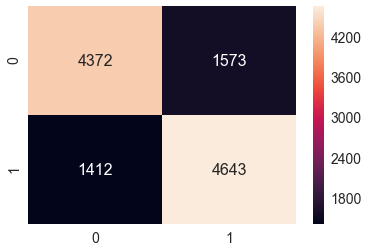

In [27]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [28]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.76      0.74      0.75      5945
   Positive       0.75      0.77      0.76      6055

avg / total       0.75      0.75      0.75     12000



# Multinomial Naive Bayes with feature selction by GridSearch

In [96]:
mNB=MultinomialNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
gsv=GridSearchCV(nB,param_grid,cv=3,verbose=1)
gsv.fit(X_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   10.8s finished


Best HyperParameter:  {'alpha': 100}
Best Accuracy: 84.08%


In [97]:
mNB_opt=MultinomialNB(alpha=100)
#fit the model
mNB_opt.fit(X_train,Y_train)
#predict the model
prediction=mNB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=%d is %f%%' % (optimal_alpha,(acc_score)))
print('#'*100)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))
print('%'*50)
training_accuracy = mNB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for bag of words model with optimal a=1 is 78.083333%
####################################################################################################
Number of mislabeled points out of a total 28000 points : 2630
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
training error:0.09%
####################################################################################################
training accuracy:0.91%
####################################################################################################
test error:0.22%
####################################################################################################
test accuracy:0.78%


In [98]:
feat_name=np.array(count_vect.get_feature_names())
f_cnt=mNB_opt.feature_count_
log_prob = mNB_opt.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns=feat_name).T
#sorted_idx=nB_opt.coef_[0].argsort()
#print("smallest coeffecient is: \n {} \n".format(feat_name[sorted_idx[:10]]))
#print("largest coefficient is: \n {} \n".format(feat_name[sorted_idx[:-11:-1]]))
top_positive = feature_prob[1].sort_values(ascending=False)[:10]
top_negative = feature_prob[0].sort_values(ascending=False)[:10]

def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(count_vect,mNB_opt)

			Positive						Negative
________________________________________________________________________________________________
	-11.3241	aafco          				-6.8062	great          
	-11.3241	aamazoncom     				-6.8311	love           
	-11.3241	aarrgh         				-6.9023	good           
	-11.3241	abbey          				-7.0438	like           
	-11.3241	abdomen        				-7.1338	tast           
	-11.3241	aberr          				-7.1469	use            
	-11.3241	abhor          				-7.1603	make           
	-11.3241	abhorr         				-7.1826	one            
	-11.3241	ablet          				-7.1948	tri            
	-11.3241	abolut         				-7.2003	flavor         
	-11.3241	abomin         				-7.2108	best           
	-11.3241	abosolut       				-7.2637	get            
	-11.3241	abouit         				-7.2871	find           
	-11.3241	abreast        				-7.3435	littl          
	-11.3241	abrupt         				-7.3569	delici         
	-11.3241	absolv         				-7.3586	also           
	-11.3241	absorbedconsid 				

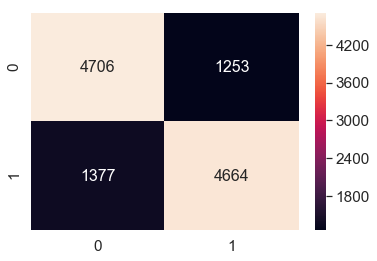

In [99]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [100]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.77      0.79      0.78      5959
   Positive       0.79      0.77      0.78      6041

avg / total       0.78      0.78      0.78     12000



# Tf_IDF

In [101]:
X=final_d["CleanedText"]
X.shape

(40000,)

In [102]:
y=final_d["Score"]
y.shape

(40000,)

In [103]:
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.30,random_state=None)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3)

In [83]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(28000,) (12000,) (28000,) (12000,)


In [104]:
tf_idf_vect=TfidfVectorizer()
final_tfidf_vect=tf_idf_vect.fit_transform(X_train)
final_test_tfidf_vect=tf_idf_vect.transform(X_test)

In [105]:
X_train=final_tfidf_vect
X_test=final_test_tfidf_vect

# To find the best alpha using cross validation

Optimal alpha:  1


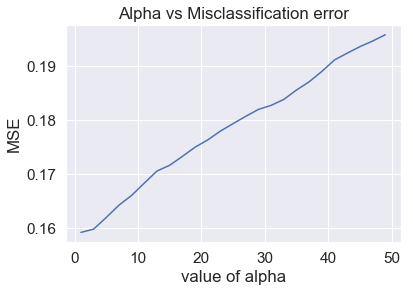

In [86]:
bNB=BernoulliNB()
alpha_list = list(range(1,50,2))
cv_score = []
for i in alpha_list:
    bNB = BernoulliNB(alpha=i)
    scores = cross_val_score(bNB, X_train, Y_train, cv=10, scoring="accuracy")
    cv_score.append(scores.mean())

MSE = [1-x for x in cv_score]
optimal_alpha = alpha_list[MSE.index(min(MSE))]
print("Optimal alpha: ",optimal_alpha)

import matplotlib.pyplot as plt
plt.plot(alpha_list, MSE)
plt.title("Alpha vs Misclassification error")
plt.xlabel("value of alpha")
plt.ylabel("MSE")
plt.show()

#l_a={'alpha':[1000,500,100,50,10,5,0.1,0.05,0.001]}
#alpha_set=[1e-3, 1e-2,1e-1, 1e-0, 1e2, 1e3, 1e4]
#for i in alpha_set:
    # instantiate learning model (alpha = 10)
#nB = BernoulliNB()
#cls=GridSearchCV(nB,l_a,cv=10)
    # fitting the model on crossvalidation train
#cls.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
#pred = cls.predict(X_cv)

    # evaluate CV accuracy
#acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
#print("Best HyperParameter: ",cls.best_params_)
#print("Best Accuracy: %.2f%%"%(cls.best_score_*100))
#test accuracy    
#nB = BernoulliNB(alpha=1000)
#nB.fit(X_train,Y_train)
#pred = nB.predict(X_test)
#acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
#print('\n****Test accuracy for alpha = 1000 is %d%%' % (acc))

In [87]:
nB_opt=BernoulliNB(alpha=optimal_alpha)
#fit the model
nB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for TfIDf model with optimal a=%d is %f%%' %(optimal_alpha,(acc_score)))

print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))

training_accuracy = nB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for TfIDf model with optimal a=1 is 83.908333%
Number of mislabeled points out of a total 28000 points : 1931
training error:0.12%
####################################################################################################
training accuracy:0.88%
####################################################################################################
test error:0.16%
####################################################################################################
test accuracy:0.84%


# Feature importance

In [88]:
feat_name=np.array(tf_idf_vect.get_feature_names())
f_cnt=nB_opt.feature_count_
log_prob = nB_opt.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns=feat_name).T
#sorted_idx=nB_opt.coef_[0].argsort()
#print("smallest coeffecient is: \n {} \n".format(feat_name[sorted_idx[:10]]))
#print("largest coefficient is: \n {} \n".format(feat_name[sorted_idx[:-11:-1]]))
top_positive = feature_prob[1].sort_values(ascending=False)[:10]
top_negative = feature_prob[0].sort_values(ascending=False)[:10]

def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(tf_idf_vect,nB_opt)

			Positive						Negative
________________________________________________________________________________________________
	-9.5485	aaaaaaarrrrrggghhh				-1.1621	like           
	-9.5485	aachen         				-1.1955	tast           
	-9.5485	aafco          				-1.2681	good           
	-9.5485	aarrgh         				-1.2734	love           
	-9.5485	aback          				-1.3148	great          
	-9.5485	abat           				-1.4523	flavor         
	-9.5485	abbey          				-1.4593	one            
	-9.5485	abdomen        				-1.4817	use            
	-9.5485	abdomin        				-1.5292	tri            
	-9.5485	aberr          				-1.5468	product        
	-9.5485	abhor          				-1.6681	make           
	-9.5485	abhorr         				-1.7031	get            
	-9.5485	ablet          				-1.8908	buy            
	-9.5485	abod           				-1.9234	time           
	-9.5485	abolut         				-1.9308	would          
	-9.5485	abomin         				-1.9786	realli         
	-9.5485	abosolut       				-2.0016	price 

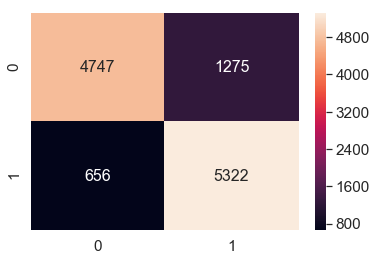

In [89]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.88      0.79      0.83      6022
   Positive       0.81      0.89      0.85      5978

avg / total       0.84      0.84      0.84     12000



# GridSearch CV feature selection

In [106]:
nB = BernoulliNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
gsv=GridSearchCV(nB,param_grid,cv=3,verbose=1)
gsv.fit(X_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   10.6s finished


Best HyperParameter:  {'alpha': 1}
Best Accuracy: 84.49%


In [107]:
nB_opt=BernoulliNB(alpha=1)
#fit the model
nB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for TfIDf model with optimal a=%d is %f%%' %(optimal_alpha,(acc_score)))

print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))

training_accuracy = nB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for TfIDf model with optimal a=1 is 84.725000%
Number of mislabeled points out of a total 28000 points : 1833
training error:0.11%
####################################################################################################
training accuracy:0.89%
####################################################################################################
test error:0.15%
####################################################################################################
test accuracy:0.85%


In [108]:
feat_name=np.array(tf_idf_vect.get_feature_names())
f_cnt=nB_opt.feature_count_
log_prob = nB_opt.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns=feat_name).T
#sorted_idx=nB_opt.coef_[0].argsort()
#print("smallest coeffecient is: \n {} \n".format(feat_name[sorted_idx[:10]]))
#print("largest coefficient is: \n {} \n".format(feat_name[sorted_idx[:-11:-1]]))
top_positive = feature_prob[1].sort_values(ascending=False)[:10]
top_negative = feature_prob[0].sort_values(ascending=False)[:10]

def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(tf_idf_vect,nB_opt)

			Positive						Negative
________________________________________________________________________________________________
	-9.5502	aachen         				-1.1692	like           
	-9.5502	aafco          				-1.2078	tast           
	-9.5502	aamazoncom     				-1.2644	love           
	-9.5502	aarrgh         				-1.2684	good           
	-9.5502	aauc           				-1.3127	great          
	-9.5502	abat           				-1.4337	flavor         
	-9.5502	abbey          				-1.4709	one            
	-9.5502	abdomen        				-1.4755	use            
	-9.5502	aberr          				-1.5279	tri            
	-9.5502	abhorr         				-1.5505	product        
	-9.5502	abject         				-1.6785	make           
	-9.5502	ablet          				-1.7189	get            
	-9.5502	abolut         				-1.9019	buy            
	-9.5502	abomin         				-1.9458	would          
	-9.5502	abottl         				-1.9478	time           
	-9.5502	abouit         				-1.9953	best           
	-9.5502	aboutbut       				-1.9958	much     

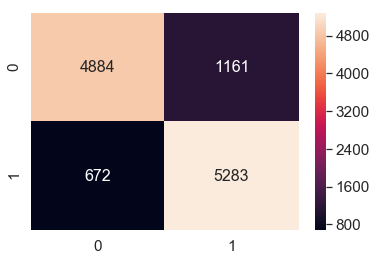

In [109]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [110]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.88      0.81      0.84      6045
   Positive       0.82      0.89      0.85      5955

avg / total       0.85      0.85      0.85     12000



# Multinomial Naive Bayes

Optimal alpha:  5


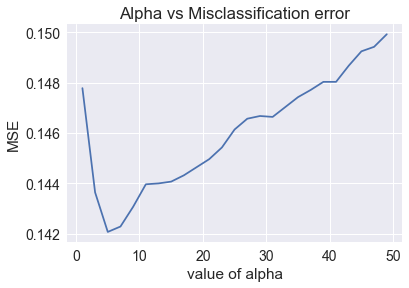

In [45]:
mNB=MultinomialNB()
alpha_list = list(range(1,50,2))
cv_score = []
for i in alpha_list:
    mNB = MultinomialNB(alpha=i)
    scores = cross_val_score(mNB, X_train, Y_train, cv=10, scoring="accuracy")
    cv_score.append(scores.mean())

MSE = [1-x for x in cv_score]
optimal_alpha = alpha_list[MSE.index(min(MSE))]
print("Optimal alpha: ",optimal_alpha)

import matplotlib.pyplot as plt
plt.plot(alpha_list, MSE)
plt.title("Alpha vs Misclassification error")
plt.xlabel("value of alpha")
plt.ylabel("MSE")
plt.show()

In [46]:
mNB_opt=MultinomialNB(alpha=optimal_alpha)
#fit the model
mNB_opt.fit(X_train,Y_train)
#predict the model
prediction=mNB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=%d is %f%%' % (optimal_alpha,(acc_score)))
print('#'*100)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))
print('%'*50)
training_accuracy = mNB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for bag of words model with optimal a=5 is 85.608333%
####################################################################################################
Number of mislabeled points out of a total 28000 points : 1727
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
training error:0.12%
####################################################################################################
training accuracy:0.88%
####################################################################################################
test error:0.14%
####################################################################################################
test accuracy:0.86%


In [47]:
feat_name=np.array(tf_idf_vect.get_feature_names())
f_cnt=mNB_opt.feature_count_
log_prob = mNB_opt.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns=feat_name).T
#sorted_idx=nB_opt.coef_[0].argsort()
#print("smallest coeffecient is: \n {} \n".format(feat_name[sorted_idx[:10]]))
#print("largest coefficient is: \n {} \n".format(feat_name[sorted_idx[:-11:-1]]))
top_positive = feature_prob[1].sort_values(ascending=False)[:10]
top_negative = feature_prob[0].sort_values(ascending=False)[:10]

def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(tf_idf_vect,mNB_opt)

			Positive						Negative
________________________________________________________________________________________________
	-10.5935	aaaaaaarrrrrggghhh				-6.0647	great          
	-10.5935	aaaaaahhhhhyaaaaaa				-6.1096	love           
	-10.5935	aaaahhhhhh     				-6.2190	good           
	-10.5935	aarrgh         				-6.2721	like           
	-10.5935	aasanfoodcom   				-6.2789	tast           
	-10.5935	aauc           				-6.2986	flavor         
	-10.5935	abalon         				-6.3113	tea            
	-10.5935	abbazabba      				-6.3667	coffe          
	-10.5935	abbott         				-6.3686	use            
	-10.5935	abbrevi        				-6.4578	product        
	-10.5935	abdomen        				-6.5235	one            
	-10.5935	abhor          				-6.6260	tri            
	-10.5935	abhorr         				-6.6290	make           
	-10.5935	abiet          				-6.6754	best           
	-10.5935	abit           				-6.7045	get            
	-10.5935	abject         				-6.7468	price          
	-10.5935	aboutbut     

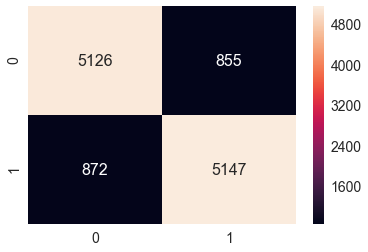

In [48]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.85      0.86      0.86      5981
   Positive       0.86      0.86      0.86      6019

avg / total       0.86      0.86      0.86     12000



 # Word2Vec

In [17]:
import gensim
from gensim.models import word2vec,KeyedVectors

D:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [40]:
X=final_d["Text"]
X.shape

(40000,)

In [41]:
y=final_d["Score"]
y.shape

(40000,)

In [42]:
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.30,random_state=None)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3)

In [23]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(28000,) (12000,) (28000,) (12000,)


In [43]:
i=0
list_of_sentence=[]
for sent in X_train.values:
    filtered_sentence=[]
    list_of_sentence.append(sent.split())
    #sent=cleanhtml(sent)
    #for w in sent.split():
      #   for cleaned in cleanpunc(w).split():
      #      if(cleaned.isalpha()):
       #         filtered_sentence.append(cleaned.lower())
        #    else:
         #       continue
#list_of_sentence.append(filtered_sentence)
#print(X["CleanedText"].values[0])
#print('###########')
#print(list_of_sentence[0])
w2v_model=gensim.models.Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)

words=list(w2v_model.wv.vocab)
print(len(words))

19582


In [25]:
w2v_model.wv.most_similar('like')

D:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('like,', 0.6465601325035095),
 ('like.', 0.5829551219940186),
 ('prefer', 0.567816972732544),
 ('notice', 0.5240753889083862),
 ('great,', 0.5214934349060059),
 ('mind', 0.5159530639648438),
 ('think', 0.5159229636192322),
 ('okay', 0.5143426656723022),
 ('expect', 0.5121126174926758),
 ('care', 0.5057751536369324)]

In [44]:
#word2vec for test
i=0
list_of_sentences=[]
for sent in X_test.values:
    filtered_sentences=[]
    list_of_sentences.append(sent.split())
    #sent=cleanhtml(sent)
    #for w in sent.split():
     #   for cleaned in cleanpunc(w).split():
      #      if(cleaned.isalpha()):
       #         filtered_sentence.append(cleaned.lower())
        #    else:
         #       continue
#list_of_sentences.append(filtered_sentence)
#print(X_train.values[0])
#print('###########')
print(list_of_sentences[0])
w2v_model_test=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=50,workers=4)

words_test=list(w2v_model_test.wv.vocab)
print(len(words_test))


["I'm", 'just', 'going', 'to', 'say', 'it:', 'These', 'CHIPS', 'Taste', 'like', 'DETERGENT.<br', '/><br', '/>Given', 'that', 'Garden', 'of', "Eatin'", 'blue', 'corn,', 'and', 'red', 'hots', 'chips', 'are', 'my', 'favorite', 'of', 'all', 'time,', "it's", 'puzzling', 'how', 'they', 'can', 'produce', 'such', 'an', 'unfortunate', 'product', 'as', '"Chili', '&', 'Lime".<br', '/><br', '/>First', 'of', 'all,', "where's", 'the', 'chili?', 'I', "don't", 'even', 'taste', 'it.', 'Even', 'tho', "I'm", 'an', 'advanced', 'chili', 'pepper', 'user,', 'I', 'have', 'a', 'very', 'keen', 'palate.', 'I', 'detect', 'less', 'than', '1', 'part', 'per', 'billion', 'of', 'chili', 'in', 'these', 'here', 'unfortunate', 'chips.<br', '/><br', '/>Also,', 'I', 'detect', 'fraudulent', 'lime', 'flavors', 'and', '*that*', 'my', 'friends', 'is', 'an', 'egregious', 'error', 'from', 'such', 'a', 'reknowned', 'company.', 'The', 'red', 'herring', 'that', "it's", 'NOT', 'natural', 'is', '"NATURAL', 'FLAVORS', 'WITH', 'LIME".'

In [45]:
from tqdm import tqdm

In [505]:
import re


def cleanhtml(sentence):
    cleantext = re.sub('<.*>', '', sentence)
    return cleantext


def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|#|@|.|,|)|(|\|/]', r'', sentence)
    return cleaned

In [509]:
print(train_w2v_words.shape, test_w2v_words.shape)

(2408, 50) (1534, 50)


# Avg-Word2Vec

In [46]:
sent_vectors = [] 
for sent in tqdm(list_of_sentence): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0 # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
        
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))
    

train_vectors=np.nan_to_num(sent_vectors)

100%|██████████████████████████████████| 28000/28000 [00:09<00:00, 2987.14it/s]


28000
50


In [47]:
test_vectors = []
for sent in tqdm(list_of_sentences):
    sent_vec = np.zeros(50)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.nan_to_num(test_vectors)

100%|██████████████████████████████████| 12000/12000 [00:03<00:00, 3021.25it/s]


In [111]:
X_train=train_vectors
X_test=test_vectors

In [112]:
X_train.shape

(28000, 50)

In [113]:
Y_train.shape

(28000,)

In [303]:
#model=word2vec.Word2Vec.load('w2vmodel')

# alpha value using old-cross validation approach


Optimal alpha:  5


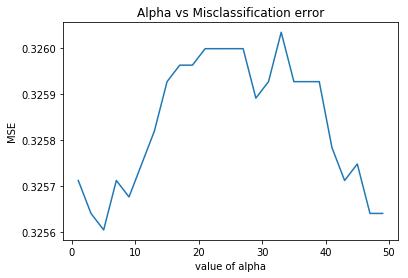

In [33]:
bNB=BernoulliNB()
alpha_list = list(range(1,50,2))
cv_score = []
for i in alpha_list:
    bNB = BernoulliNB(alpha=i)
    scores = cross_val_score(bNB, X_train, Y_train, cv=10, scoring="accuracy")
    cv_score.append(scores.mean())

MSE = [1-x for x in cv_score]
optimal_alpha = alpha_list[MSE.index(min(MSE))]
print("Optimal alpha: ",optimal_alpha)

import matplotlib.pyplot as plt
plt.plot(alpha_list, MSE)
plt.title("Alpha vs Misclassification error")
plt.xlabel("value of alpha")
plt.ylabel("MSE")
plt.show()








#l_a={'alpha':[1000,500,100,50,10,5,0.1,0.05,0.001]}
#alpha_set=[1e-3, 1e-2,1e-1, 1e-0, 1e2, 1e3, 1e4]
#for i in alpha_set:
    # instantiate learning model (alpha = 10)
#nB = BernoulliNB()
#cls=GridSearchCV(nB,l_a,cv=10)
    # fitting the model on crossvalidation train
#cls.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
#pred = cls.predict(X_cv)

    # evaluate CV accuracy
#acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
#print("Best HyperParameter: ",cls.best_params_)
#print("Best Accuracy: %.2f%%"%(cls.best_score_*100))
#test accuracy    
#nB = BernoulliNB(alpha=1000)
#nB.fit(X_train,Y_train)
#pred = nB.predict(X_test)
#acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
#print('\n****Test accuracy for alpha = 1000 is %d%%' % (acc))

In [34]:
nB_opt=BernoulliNB(alpha=optimal_alpha)
#fit the model
nB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=%d is %f%%' %(optimal_alpha,(acc_score)))

print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))

training_accuracy = nB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)



 the accuracy score for bag of words model with optimal a=5 is 67.850000%
Number of mislabeled points out of a total 28000 points : 3858
training error:0.33%
####################################################################################################
training accuracy:0.67%
####################################################################################################
test error:0.32%
####################################################################################################
test accuracy:0.68%


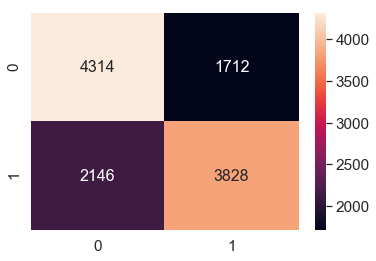

In [36]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Grid Search CV feature selection

In [114]:
nB = BernoulliNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
gsv=GridSearchCV(nB,param_grid,cv=3,verbose=1)
gsv.fit(X_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   14.0s finished


Best HyperParameter:  {'alpha': 1000}
Best Accuracy: 50.15%


In [115]:
nB_opt=BernoulliNB(alpha=1000)
#fit the model
nB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=%d is %f%%' %(optimal_alpha,(acc_score)))

print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))

training_accuracy = nB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for bag of words model with optimal a=1 is 49.283333%
Number of mislabeled points out of a total 28000 points : 6086
training error:0.49%
####################################################################################################
training accuracy:0.51%
####################################################################################################
test error:0.51%
####################################################################################################
test accuracy:0.49%


# Weighted Tf-IDf Word2Vec

In [55]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final_d['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [56]:
X=final_d["CleanedText"]
X.shape

(40000,)

In [57]:
y=final_d["Score"]
y.shape

(40000,)

In [59]:
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.30,random_state=None)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3,random_state=None)

In [60]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(28000,) (12000,) (28000,) (12000,)


In [61]:
tfidf_vect = TfidfVectorizer()
train_tfidf_w2v = tfidf_vect.fit_transform(X_train)
test_tfidf_w2v = model.transform(X_test)

In [62]:
print(train_tfidf_w2v.shape,test_tfidf_w2v.shape)

(28000, 26916) (12000, 32822)


In [63]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentence): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
        
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████████████████████████████| 28000/28000 [00:11<00:00, 2402.95it/s]


In [64]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf    
        except:
            pass
            
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|██████████████████████████████████| 12000/12000 [00:04<00:00, 2474.46it/s]


In [65]:
X_train=np.array(tfidf_sent_vectors)
X_test=np.array(tfidf_sent_vectors_test)

# alpha value using GridSearch Cross-validation

In [67]:
bNB=BernoulliNB()
alpha_list = list(range(1,50,2))
cv_score = []
for i in alpha_list:
    bNB = BernoulliNB(alpha=i)
    scores = cross_val_score(bNB, X_train, Y_train, cv=10, scoring="accuracy")
    cv_score.append(scores.mean())

MSE = [1-x for x in cv_score]
optimal_alpha = alpha_list[MSE.index(min(MSE))]
print("Optimal alpha: ",optimal_alpha)
#l_a={'alpha':[1000,500,100,50,10,5,0.1,0.05,0.001]}
#alpha_set=[1e-3, 1e-2,1e-1, 1e-0, 1e2, 1e3, 1e4]
#for i in alpha_set:
    # instantiate learning model (alpha = 10)
#nB = BernoulliNB()
#cls=GridSearchCV(nB,l_a,cv=10)
    # fitting the model on crossvalidation train
#cls.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
#pred = cls.predict(X_cv)

    # evaluate CV accuracy
#acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
#print("Best HyperParameter: ",cls.best_params_)
#print("Best Accuracy: %.2f%%"%(cls.best_score_*100))
#test accuracy    
#nB = BernoulliNB(alpha=1)
#nB.fit(X_train,Y_train)
#pred = nB.predict(X_test)
#acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
#print('\n****Test accuracy for alpha = 1000 is %d%%' % (acc))

Optimal alpha:  3


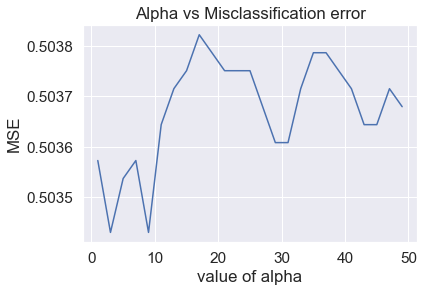

In [69]:
import matplotlib.pyplot as plt
plt.plot(alpha_list, MSE)
plt.title("Alpha vs Misclassification error")
plt.xlabel("value of alpha")
plt.ylabel("MSE")
plt.show()

In [68]:
nB_opt=BernoulliNB(alpha=optimal_alpha)
#fit the model
nB_opt.fit(X_train,Y_train)
#predict the model
prediction=nB_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal a=%d is %f%%' %(optimal_alpha,(acc_score)))

print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(Y_test != prediction).sum()))


training_accuracy = nB_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)



 the accuracy score for bag of words model with optimal a=3 is 49.591667%
Number of mislabeled points out of a total 28000 points : 6049
training error:0.49%
####################################################################################################
training accuracy:0.51%
####################################################################################################
test error:0.50%
####################################################################################################
test accuracy:0.50%


# Confusion matrix

----------------------------------------------------------------------------------------------------------------------
             precision    recall  f1-score   support

   Negative       0.50      0.45      0.47      6067
   Positive       0.49      0.55      0.52      5933

avg / total       0.50      0.50      0.49     12000



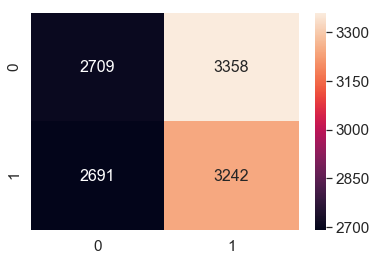

In [72]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

print("----------------------------------------------------------------------------------------------------------------------")

from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

# Observations & Conclusions

1) We get a 83-85% accurate model with BoW and Tf-Idf with GridSearch CV used for feature selection(with precision and recall at 85%/83%). while for AvgWord2Vec and WeightedTfIdf Word2Vec model,the acuracy level is low compared to BoW and Tf-Idf